In [2]:
%matplotlib inline


# Two-class AdaBoost


This example fits an AdaBoosted decision stump on a non-linearly separable
classification dataset composed of two "Gaussian quantiles" clusters
(see :func:`sklearn.datasets.make_gaussian_quantiles`) and plots the decision
boundary and decision scores. The distributions of decision scores are shown
separately for samples of class A and B. The predicted class label for each
sample is determined by the sign of the decision score. Samples with decision
scores greater than zero are classified as B, and are otherwise classified
as A. The magnitude of a decision score determines the degree of likeness with
the predicted class label. Additionally, a new dataset could be constructed
containing a desired purity of class B, for example, by only selecting samples
with a decision score above some value.




In [2]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)



Automatically created module for IPython interactive environment


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

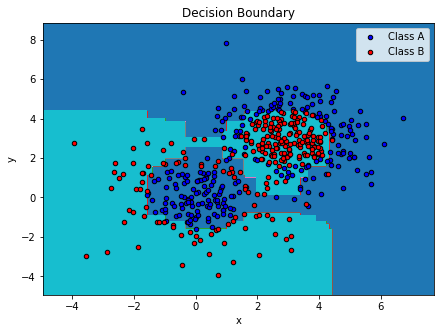

In [3]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"
cmap = plt.cm.tab10

plt.figure(figsize=(7, 5))

# Plot the decision boundaries
#plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=cmap)
plt.axis('tight')


# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=cmap,
                s=20, edgecolor='k',
                label='Class {}'.format(n))

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')
plt.savefig('Classification.svg')

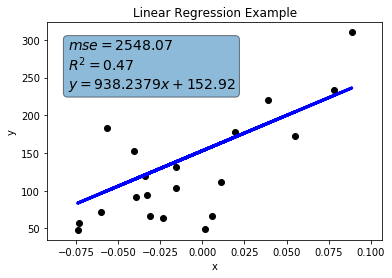

In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
m = regr.coef_
b = regr.intercept_ 
mse = mean_squared_error(diabetes_y_test, diabetes_y_pred)
r2 = r2_score(diabetes_y_test, diabetes_y_pred)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')

# text box
textstr = '$mse={:.2f}$\n$R^2={:.2f}$ \n$y={:.4f}x+{:.2f}$'.format(mse, r2, m[0], b)
plt.text(-0.08, 300.0, textstr, fontsize=14,
         verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.5))

plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Example')

plt.savefig('Linear_Reg_scatter.svg')

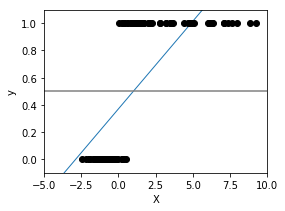

In [5]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()

plt.xlim(-5, 10)
plt.ylim(-0.1, 1.1)

ols = linear_model.LinearRegression()
ols.fit(X, y)

plt.ylabel('y')
plt.xlabel('X')

plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

#plt.axis('tight')

#plt.plot(X_test, loss, color='red', linewidth=3)
plt.savefig('logit_line_data.svg')

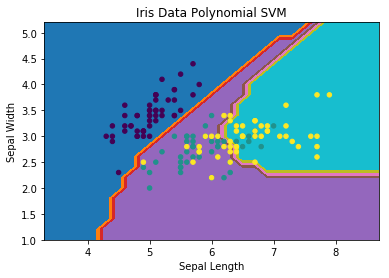

In [6]:
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X0, X1 = X[:, 0], X[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))


model = svm.SVC(kernel='poly', degree=4)
model.fit(X, y)


Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10)
plt.scatter(X0, X1, c=y, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data Polynomial SVM')
plt.savefig('Iris_Data_labeled_poly.svg')

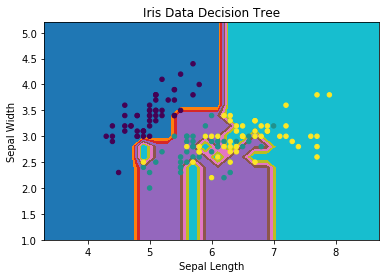

In [12]:
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X0, X1 = X[:, 0], X[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

model = DecisionTreeClassifier()
model.fit(X, y)


Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10)
plt.scatter(X0, X1, c=y, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data Decision Tree')
plt.savefig('Iris_Data_DT.svg')

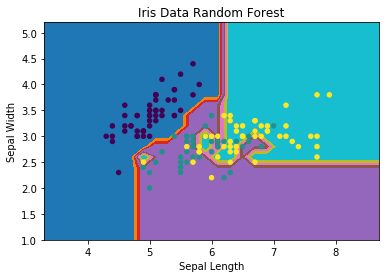

In [68]:
from sklearn.ensemble import RandomForestClassifier

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X0, X1 = X[:, 0], X[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

model = RandomForestClassifier()
model.fit(X, y)


Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10)
plt.scatter(X0, X1, c=y, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data Random Forest')
plt.savefig('Iris_Data_RF.svg')

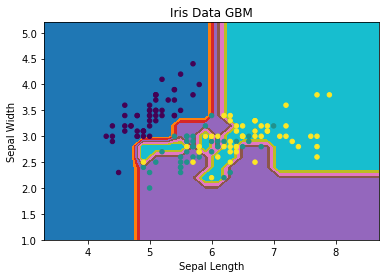

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X0, X1 = X[:, 0], X[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=5000)
model.fit(X, y)


Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10)
plt.scatter(X0, X1, c=y, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data GBM')
plt.savefig('Iris_Data_GBM.svg')

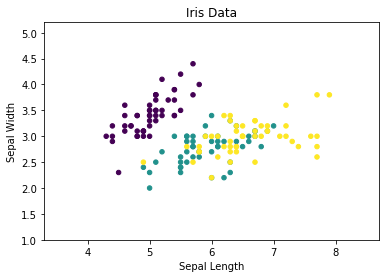

In [15]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X0, X1 = X[:, 0], X[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))


plt.figure()
plt.scatter(X0, X1, c=y, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data')
plt.savefig('Iris_Data.svg')

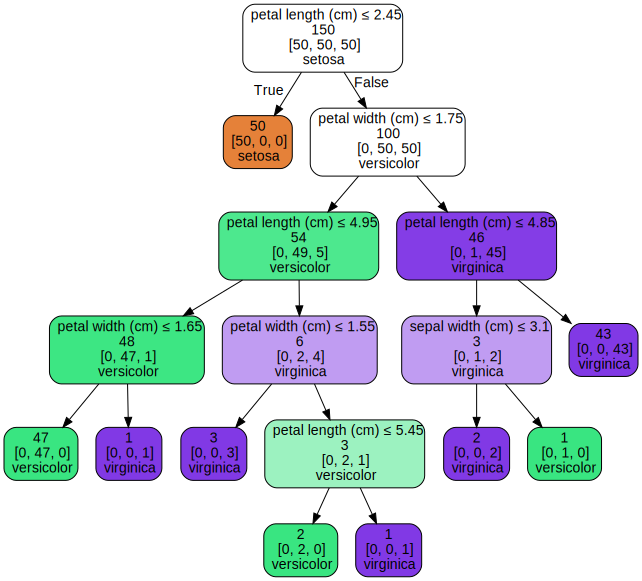

In [59]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                #out_file='DT_2_simple.dot',
                                max_depth=None,
                                feature_names=iris.feature_names,
                                label='none',
                                impurity=False,
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data) 
#graph.render("iris")
graph

In [65]:
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                max_depth=5,
                                feature_names=iris.feature_names,
                                label='none',
                                impurity=False,
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render('dot', 'svg', 'DT_6_simple')

'svg/dot.pdf'

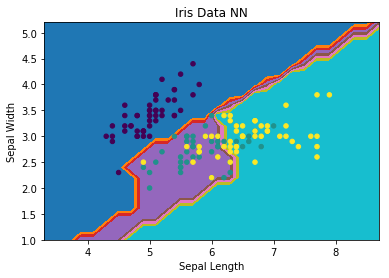

In [82]:
from sklearn.neural_network import MLPClassifier

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X0, X1 = X[:, 0], X[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=1234)
model.fit(X, y)


Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10)
plt.scatter(X0, X1, c=y, s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data NN')
plt.savefig('Iris_Data_NN.svg')

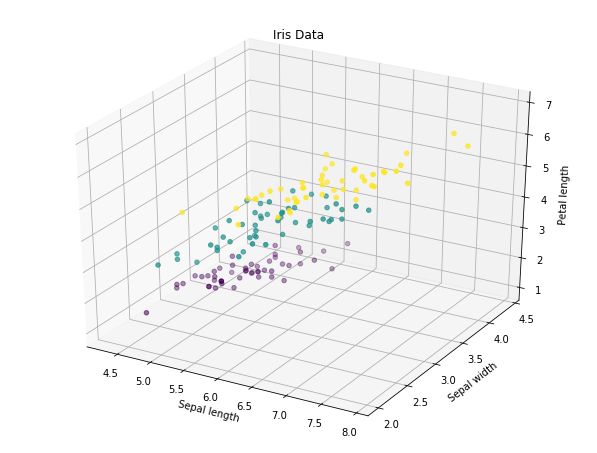

In [108]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :3]
y = iris.target

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)#, elev=-150, azim=110)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)#, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris Data")
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')

plt.savefig('Iris_Data_3comp.pdf')

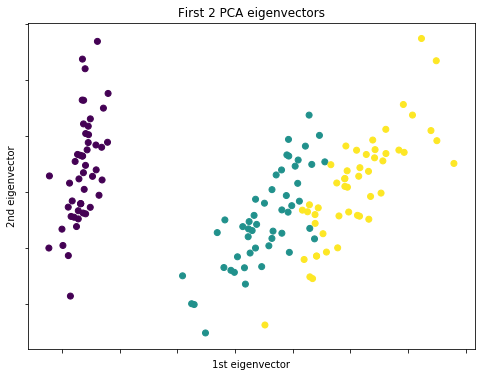

In [112]:
from sklearn.decomposition import PCA
fig = plt.figure(1, figsize=(8, 6))
ax = fig.gca()
X_reduced = PCA(n_components=2).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)#, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First 2 PCA eigenvectors")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
plt.savefig('Iris_PCA.pdf')

In [9]:
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:, :2]
X_clust =  KMeans(n_clusters=3).fit(iris.data)

In [10]:
labels = X_clust.labels_
y = iris.target
y = [[a] for a in y]
labels = [[a] for a in labels]
X_y = np.hstack((X,y, labels))

In [15]:
X_y

array([[5.1, 3.5, 0. , 1. ],
       [4.9, 3. , 0. , 1. ],
       [4.7, 3.2, 0. , 1. ],
       [4.6, 3.1, 0. , 1. ],
       [5. , 3.6, 0. , 1. ],
       [5.4, 3.9, 0. , 1. ],
       [4.6, 3.4, 0. , 1. ],
       [5. , 3.4, 0. , 1. ],
       [4.4, 2.9, 0. , 1. ],
       [4.9, 3.1, 0. , 1. ],
       [5.4, 3.7, 0. , 1. ],
       [4.8, 3.4, 0. , 1. ],
       [4.8, 3. , 0. , 1. ],
       [4.3, 3. , 0. , 1. ],
       [5.8, 4. , 0. , 1. ],
       [5.7, 4.4, 0. , 1. ],
       [5.4, 3.9, 0. , 1. ],
       [5.1, 3.5, 0. , 1. ],
       [5.7, 3.8, 0. , 1. ],
       [5.1, 3.8, 0. , 1. ],
       [5.4, 3.4, 0. , 1. ],
       [5.1, 3.7, 0. , 1. ],
       [4.6, 3.6, 0. , 1. ],
       [5.1, 3.3, 0. , 1. ],
       [4.8, 3.4, 0. , 1. ],
       [5. , 3. , 0. , 1. ],
       [5. , 3.4, 0. , 1. ],
       [5.2, 3.5, 0. , 1. ],
       [5.2, 3.4, 0. , 1. ],
       [4.7, 3.2, 0. , 1. ],
       [4.8, 3.1, 0. , 1. ],
       [5.4, 3.4, 0. , 1. ],
       [5.2, 4.1, 0. , 1. ],
       [5.5, 4.2, 0. , 1. ],
       [4.9, 3

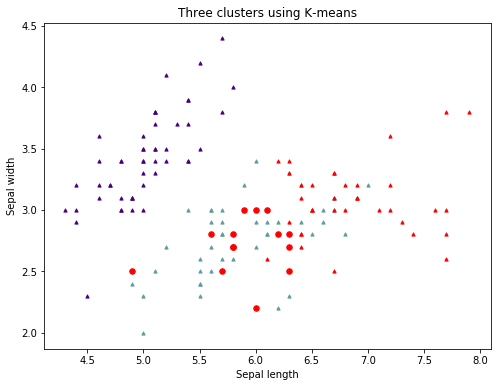

In [16]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.gca()

cmap = {0:'indigo', 1:'cadetblue', 2:'red'}

for i in range(X_y.shape[0]):
    if X_y[i, 2] != X_y[i, 3]:
        ax.scatter(X_y[i, 0], X_y[i, 1], c=cmap[X_y[i,2]], marker='^', s=10)
    elif X_y[i, 2] == X_y[i, 3]:
        ax.scatter(X_y[i, 0], X_y[i, 1], c=cmap[X_y[i,2]], marker='o', s=30)

ax.set_title("Three clusters using K-means")
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
plt.savefig('Iris_3means.pdf')